In [1]:
import os, subprocess

In [2]:
rootdir = "/bucket/ReiterU/DBS/data/20220517_P185_laqueus_DiI_L-M27/"
resultdir = os.path.join(rootdir, "analysis")
if not os.path.exists(resultdir):
    subprocess.run(["ssh", "deigo", "mkdir", resultdir])

In [3]:
cwd = os.path.basename(os.getcwd())
tmpdir = os.path.join("/flash/ReiterU/tmp/", cwd, "registration_QC")
if not os.path.exists(tmpdir):
    os.makedirs(tmpdir)

In [4]:
from matplotlib import pyplot as plt
from probemapper.io import save_nifti, load_nifti
import numpy as np

## Load image

In [5]:
ref = load_nifti(os.path.join(rootdir, "analysis", "ants", "O_Laqueues_v0.1_10um_masked.nii"))
warped = load_nifti(os.path.join(rootdir, "analysis", "ants", "Warped.nii.gz"))

ref = ref.astype("float")
warped = warped.astype("float")

## Overlay

In [6]:
from probemapper.registration.qc import overlay_brains

In [7]:
rgb = overlay_brains(ref, warped, [0, 3000], [0,10000], gamma=1.8)

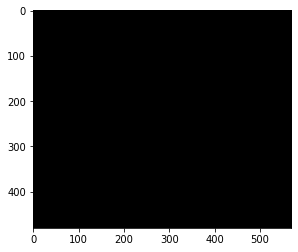

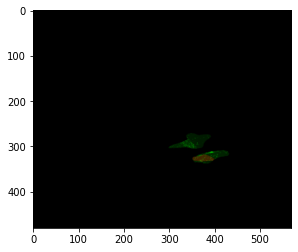

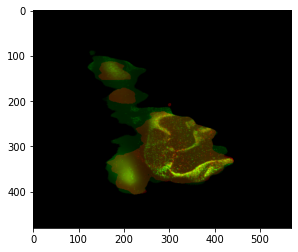

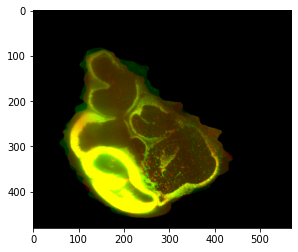

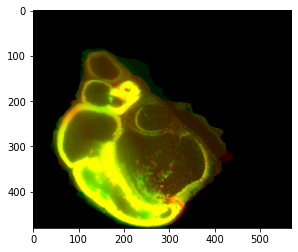

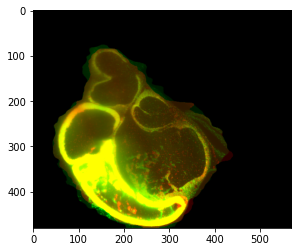

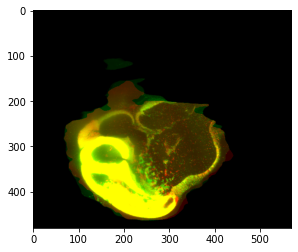

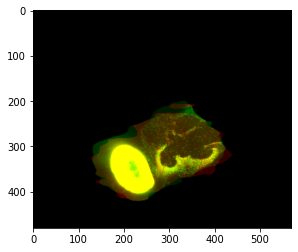

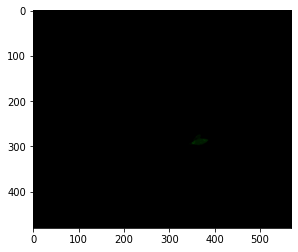

In [8]:
for i in range(0,rgb.shape[2],50):
    plt.imshow(rgb[:,:,i])
    plt.show()

In [9]:
from probemapper.registration.qc import show_brain_side_by_side

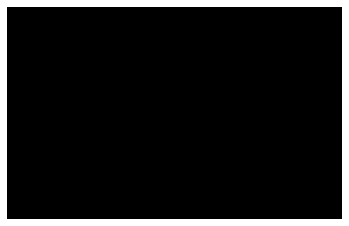

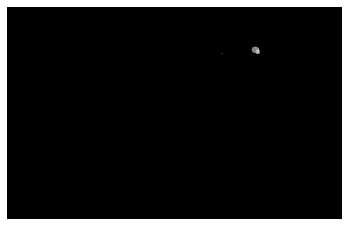

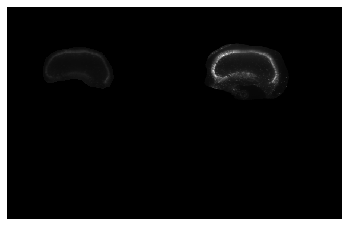

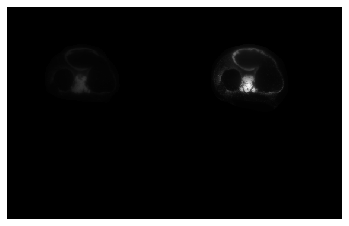

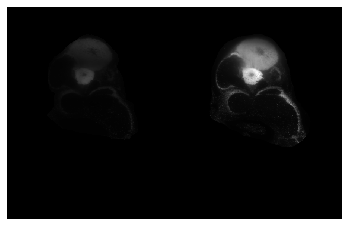

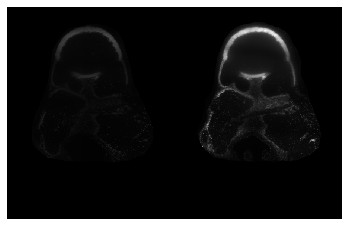

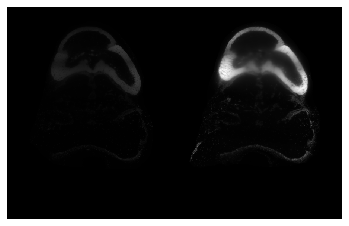

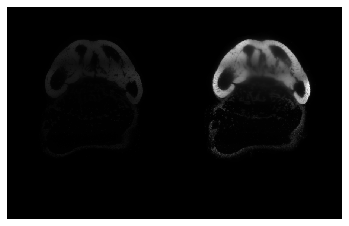

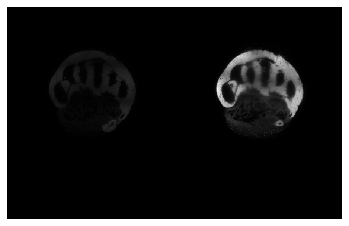

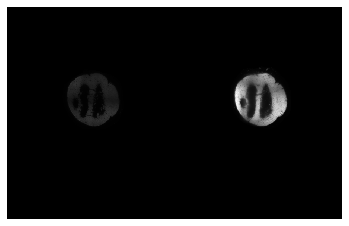

In [10]:
show_brain_side_by_side(ref, warped)

## NCC

In [11]:
from probemapper.registration.metric import NCC_3D

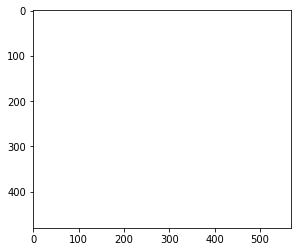

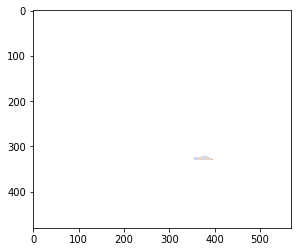

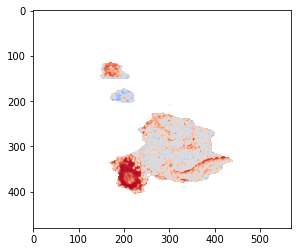

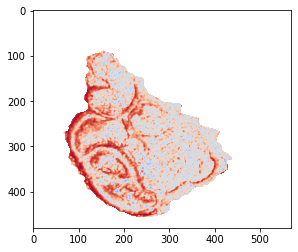

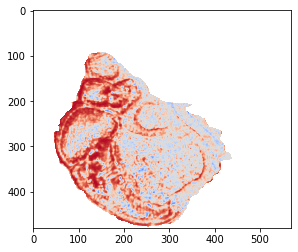

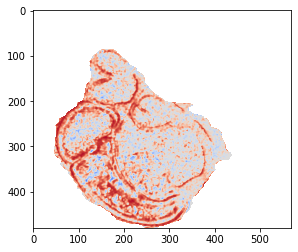

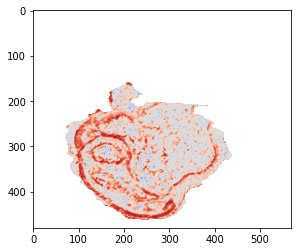

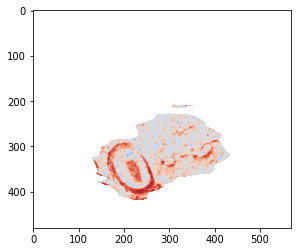

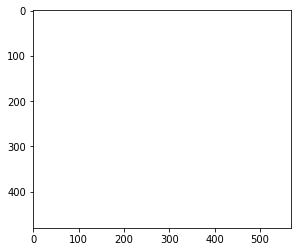

In [12]:
ncc = NCC_3D(ref, warped, ws=4)
ncc[ref==0] = np.nan

for i in range(0,ncc.shape[2],50):
    plt.imshow(ncc[:,:,i], vmin=-1, vmax=1, cmap="coolwarm")
    plt.show()

In [13]:
save_nifti(ncc, os.path.join(tmpdir, "NCC.nii.gz"), 1, 1, 1)

## Warped grid

In [14]:
from probemapper.registration.qc import create_warped_grid_image

In [15]:
create_warped_grid_image("/apps/unit/ReiterU/ANTs/2.3.5/bin",
                         os.path.join(rootdir, "analysis", "ants", "F2M_1Warp.nii.gz"),
                         os.path.join(tmpdir, "warped_grid.nii.gz"),
                         directions="1x1x0", gs=50)

['/apps/unit/ReiterU/ANTs/2.3.5/bin/CreateWarpedGridImage', '3', '/bucket/ReiterU/DBS/data/20220517_P185_laqueus_DiI_L-M27/analysis/ants/F2M_1Warp.nii.gz', '/flash/ReiterU/tmp/P185/registration_QC/warped_grid.nii.gz', '1x1x0', '50x50x50']

0


In [16]:
warped_grid = load_nifti(os.path.join(tmpdir, "warped_grid.nii.gz"))

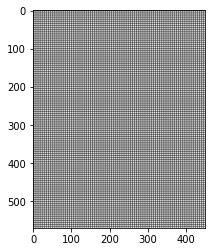

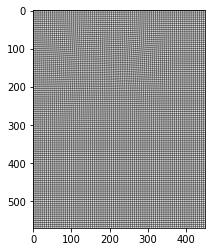

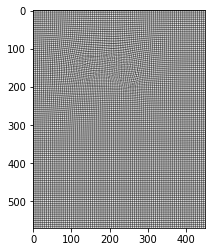

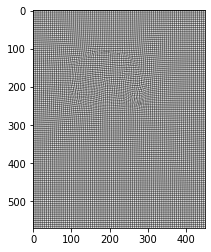

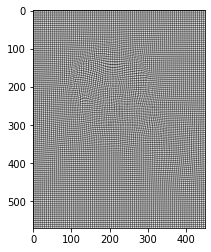

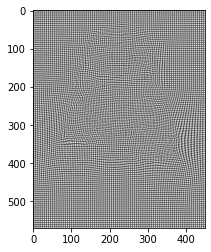

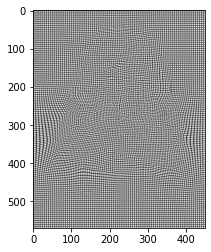

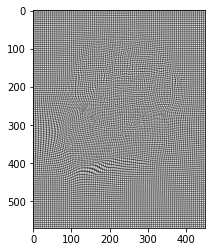

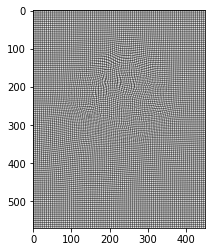

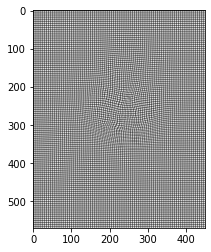

In [17]:
for i in range(0,warped_grid.shape[0],50):
    plt.imshow(warped_grid[i,:,:], cmap="gray")
    plt.show()

In [18]:
from probemapper.registration.qc import create_jacobian_determinant_image

In [19]:
create_jacobian_determinant_image("/apps/unit/ReiterU/ANTs/2.3.5/bin",
                                  os.path.join(rootdir, "analysis", "ants", "F2M_1Warp.nii.gz"),
                                  os.path.join(tmpdir, "jacobian_determinant.nii.gz"),)

['/apps/unit/ReiterU/ANTs/2.3.5/bin/CreateJacobianDeterminantImage', '3', '/bucket/ReiterU/DBS/data/20220517_P185_laqueus_DiI_L-M27/analysis/ants/F2M_1Warp.nii.gz', '/flash/ReiterU/tmp/P185/registration_QC/jacobian_determinant.nii.gz']

0


In [20]:
jacobian = load_nifti(os.path.join(tmpdir, "jacobian_determinant.nii.gz"))

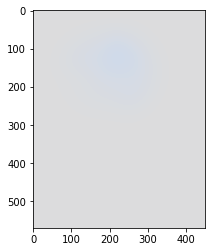

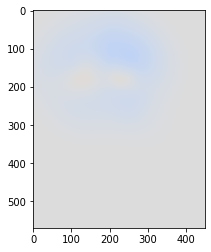

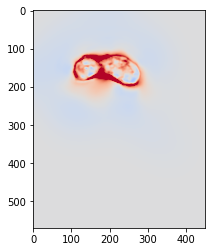

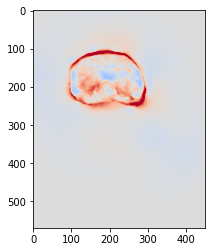

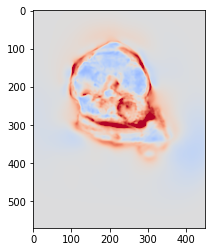

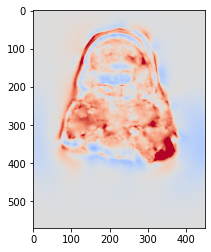

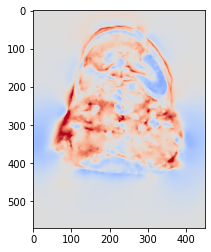

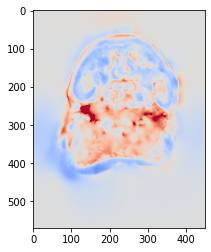

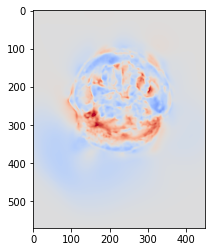

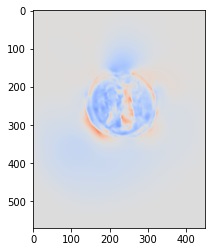

In [21]:
for i in range(0, jacobian.shape[0],50):
    plt.imshow(jacobian[i,:,:], vmin=0, vmax=2, cmap="coolwarm")
    plt.show()

In [22]:
import subprocess
subprocess.run(["scp", "-r", tmpdir, f"deigo:{resultdir}"])

CompletedProcess(args=['scp', '-r', '/flash/ReiterU/tmp/P185/registration_QC', 'deigo:/bucket/ReiterU/DBS/data/20220517_P185_laqueus_DiI_L-M27/analysis'], returncode=0)